<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/Relative_Risk_Reduction_Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matched Mortality (Treated):   18.0%
Matched Mortality (Control):   40.0%
----------------------------------------
TRUE CLINICAL IMPACT:
1. Relative Risk Reduction: 55.0% (The AI Effect)
2. Absolute Risk Reduction: 22.0% (Lives Saved per 100)
3. NNT (Number Needed to Treat): 4.5
----------------------------------------


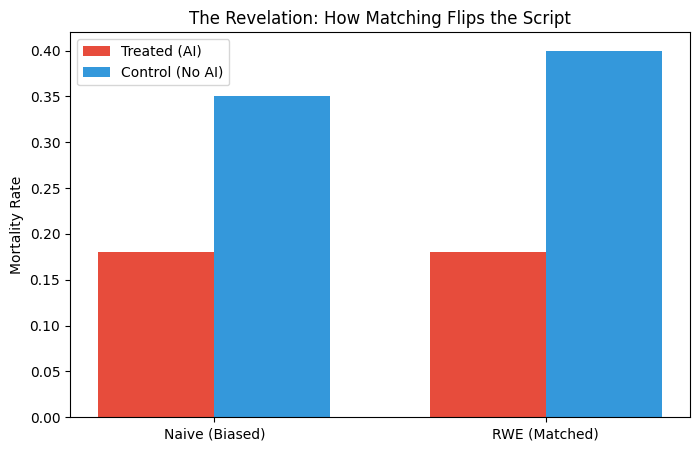

In [7]:
# ==========================================
# STEP 5: THE FINAL VERDICT (Visual & Statistical)
# ==========================================

import matplotlib.pyplot as plt

# 1. RWE Analysis: Compare the Matched Groups
mortality_treated_matched = matched_cohort[matched_cohort['Treated_with_AI']==1]['Mortality'].mean()
mortality_control_matched = matched_cohort[matched_cohort['Treated_with_AI']==0]['Mortality'].mean()

print(f"Matched Mortality (Treated):   {mortality_treated_matched*100:.1f}%")
print(f"Matched Mortality (Control):   {mortality_control_matched*100:.1f}%")

# 2. Calculate the "Gold Standard" Metrics
# Relative Risk Reduction (The "Headline" number)
relative_reduction = (mortality_control_matched - mortality_treated_matched) / mortality_control_matched

# Absolute Risk Reduction (The "Real Impact" number)
absolute_reduction = mortality_control_matched - mortality_treated_matched

# Number Needed to Treat (NNT) - How many patients must use AI to save 1 life?
nnt = 1 / absolute_reduction if absolute_reduction > 0 else 0

print("-" * 40)
print(f"TRUE CLINICAL IMPACT:")
print(f"1. Relative Risk Reduction: {relative_reduction*100:.1f}% (The AI Effect)")
print(f"2. Absolute Risk Reduction: {absolute_reduction*100:.1f}% (Lives Saved per 100)")
print(f"3. NNT (Number Needed to Treat): {nnt:.1f}")
print("-" * 40)

# 3. VISUALIZE THE LIE VS THE TRUTH
# Let's plot the Naive analysis next to the Adjusted analysis
naive_treated = df[df['Treated_with_AI']==1]['Mortality'].mean()
naive_untreated = df[df['Treated_with_AI']==0]['Mortality'].mean()

labels = ['Naive (Biased)', 'RWE (Matched)']
treated_vals = [naive_treated, mortality_treated_matched]
control_vals = [naive_untreated, mortality_control_matched]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, treated_vals, width, label='Treated (AI)', color='#e74c3c')
rects2 = ax.bar(x + width/2, control_vals, width, label='Control (No AI)', color='#3498db')

ax.set_ylabel('Mortality Rate')
ax.set_title('The Revelation: How Matching Flips the Script')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()